In [3]:
import numpy as np
import pandas as pd
import os

In [4]:
data=pd.read_csv("./Dataset/Restaurant/Restaurants_Train_v2.csv")

In [5]:
data.shape

(3693, 6)

In [6]:
data.head()

,id,Sentence,Aspect Term,polarity,from,to
0,3121,But the staff was so horrible to us.,staff,negative,8,13
1,2777,"To be completely fair, the only redeeming fact...",food,positive,57,61
2,1634,"The food is uniformly exceptional, with a very...",food,positive,4,8
3,1634,"The food is uniformly exceptional, with a very...",kitchen,positive,55,62
4,1634,"The food is uniformly exceptional, with a very...",menu,neutral,141,145


# PreProcessing

In [8]:
data.head()

,id,Sentence,Aspect Term,polarity,from,to
0,3121,But the staff was so horrible to us.,staff,negative,8,13
1,2777,"To be completely fair, the only redeeming fact...",food,positive,57,61
2,1634,"The food is uniformly exceptional, with a very...",food,positive,4,8
3,1634,"The food is uniformly exceptional, with a very...",kitchen,positive,55,62
4,1634,"The food is uniformly exceptional, with a very...",menu,neutral,141,145


In [9]:
data.isnull().sum()

id             0
Sentence       0
Aspect Term    0
polarity       0
from           0
to             0
dtype: int64

In [10]:
data['Sentence'].duplicated().sum()

np.int64(1674)

In [11]:
len(pd.unique(data['Sentence']))

2019

Các câu có giá trị trùng lặp vì một câu có thể chứa nhiều thuật ngữ khía cạnh.

# Analysis

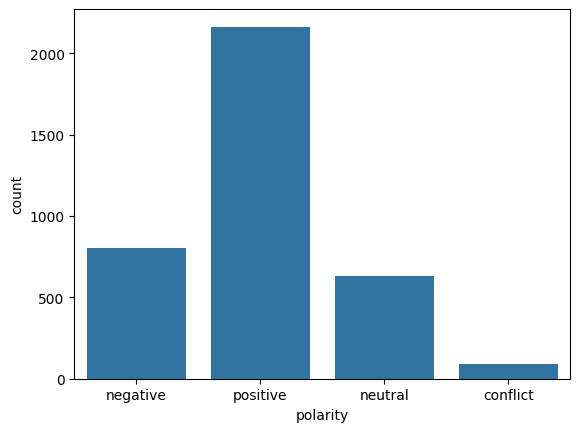

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=data,x='polarity')
plt.show()

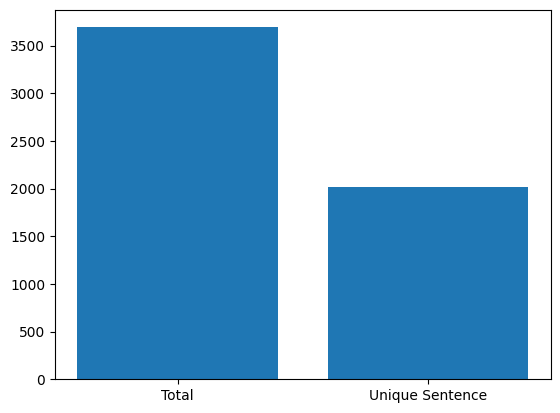

In [13]:
plt.bar(x=['Total','Unique Sentence'],height=[3693,2019])
plt.show()

In [14]:
data[data['polarity']=='conflict'].head()

,id,Sentence,Aspect Term,polarity,from,to
64,863,The food was delicious but do not come here on...,food,conflict,4,8
101,183,The service varys from day to day- sometimes t...,service,conflict,4,11
133,2274,Though the Spider Roll may look like a challen...,Spider Roll,conflict,11,22
142,856,"An oasis of refinement: Food, though somewhat...",Food,conflict,25,29
172,173,"Food is usually very good, though ocasionally ...",Food,conflict,0,4


In [17]:
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('omw-1.4')
nlp = spacy.load('en_core_web_sm')

# Initialize tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text=text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = nltk.word_tokenize(text)

    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]


    # Step 6: Removing numbers
    tokens = [ word for word in tokens if not word.isdigit()]
    temp=''
    for i in tokens:
        temp=temp+i+' '
    temp.strip()
    return temp

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Viet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Viet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Viet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Viet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Viet\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [20]:
print(preprocess('but the staff was so horrible to us'))

staff horribl us 


In [21]:
data['Sentence']=[preprocess(i) for i in data['Sentence']]
data['Aspect Term']=[preprocess(i) for i in data['Aspect Term']]

In [24]:
word_count=[len(str(i).split(' '))-1 for i in data['Sentence']]
data['word_count']=word_count

In [25]:
data.head()

,id,Sentence,Aspect Term,polarity,from,to,word_count
0,3121,staff horribl us,staff,negative,8,13,3
1,2777,complet fair redeem factor food averag couldnt...,food,positive,57,61,10
2,1634,food uniformli except capabl kitchen proudli w...,food,positive,4,8,13
3,1634,food uniformli except capabl kitchen proudli w...,kitchen,positive,55,62,13
4,1634,food uniformli except capabl kitchen proudli w...,menu,neutral,141,145,13


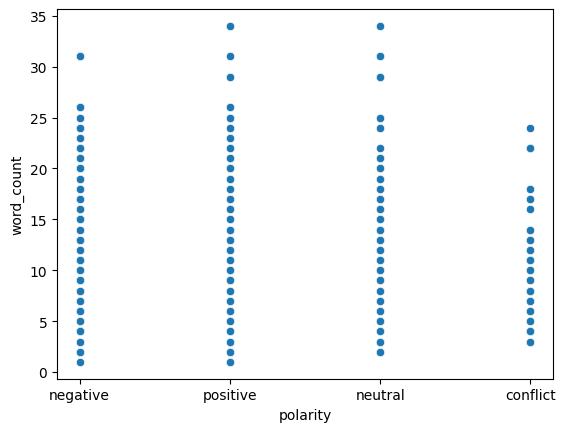

In [26]:
sns.scatterplot(data=data,x='polarity',y='word_count')
plt.show()

In [29]:
tfidf_vectorizer = TfidfVectorizer()

data['vector'] = [tfidf_vectorizer.fit_transform([i]).toarray() for i in data['Sentence']]

In [30]:
%%capture
def compute_aspect_tfidf(sentence, aspect_term):
    #print(sentence)
    #print(aspect_term)
    aspect_term=aspect_term.strip()
    print(aspect_term)
    vectorizer = TfidfVectorizer()  # Initialize the vectorizer
    tfidf_matrix = vectorizer.fit_transform([sentence])  # Fit and transform the sentence
    feature_names = vectorizer.get_feature_names_out()  # Get feature names (terms in the sentence)
    tfidf_scores = tfidf_matrix.toarray().flatten()  # Get TF-IDF scores as a flat array
    print(feature_names.tolist())
    #print(tfidf_scores)
    # Check if aspect term exists in the vocabulary
    if aspect_term in feature_names:
        # Return the TF-IDF score for the aspect term
        
    #print(feature_names.tolist().index(aspect_term))
        return tfidf_scores[feature_names.tolist().index(aspect_term)]
    else:
        # If aspect term is not in the vocabulary, return 0
        return 0

# Apply the function to compute aspect term TF-IDF scores
#data['Aspect_TFIDF'] = data.apply(lambda row: compute_aspect_tfidf(row['Sentence'], row['Aspect Term']), axis=1)
#compute_aspect_tfidf('staff horribl us','staff')
data['Aspect_TFIDF']=[compute_aspect_tfidf(i,j) for i,j in zip(data['Sentence'],data['Aspect Term'])]

In [31]:
data.head()

,id,Sentence,Aspect Term,polarity,from,to,word_count,vector,Aspect_TFIDF
0,3121,staff horribl us,staff,negative,8,13,3,"[[0.5773502691896258, 0.5773502691896258, 0.57...",0.577350
1,2777,complet fair redeem factor food averag couldnt...,food,positive,57,61,10,"[[0.31622776601683794, 0.31622776601683794, 0....",0.316228
2,1634,food uniformli except capabl kitchen proudli w...,food,positive,4,8,13,"[[0.2773500981126146, 0.2773500981126146, 0.27...",0.277350
3,1634,food uniformli except capabl kitchen proudli w...,kitchen,positive,55,62,13,"[[0.2773500981126146, 0.2773500981126146, 0.27...",0.277350
4,1634,food uniformli except capabl kitchen proudli w...,menu,neutral,141,145,13,"[[0.2773500981126146, 0.2773500981126146, 0.27...",0.277350


In [32]:
data=data.drop(['from','to'],axis=1)

Bỏ from,to vì chúng chỉ cung cấp ngữ cảnh các index của thuật ngữ khía cạnh chứ không quyết định đến việc phân định cảm xúc do đó nên bỏ

In [33]:
def polarity_conv(i):
    if i=='negative':
        return -1
    elif i=='neutral':
        return 0
    elif i=='positive':
        return 1
    else:
        return 2
data.polarity=[polarity_conv(i) for i in data['polarity']]

In [34]:
data.head()

,id,Sentence,Aspect Term,polarity,word_count,vector,Aspect_TFIDF
0,3121,staff horribl us,staff,-1,3,"[[0.5773502691896258, 0.5773502691896258, 0.57...",0.577350
1,2777,complet fair redeem factor food averag couldnt...,food,1,10,"[[0.31622776601683794, 0.31622776601683794, 0....",0.316228
2,1634,food uniformli except capabl kitchen proudli w...,food,1,13,"[[0.2773500981126146, 0.2773500981126146, 0.27...",0.277350
3,1634,food uniformli except capabl kitchen proudli w...,kitchen,1,13,"[[0.2773500981126146, 0.2773500981126146, 0.27...",0.277350
4,1634,food uniformli except capabl kitchen proudli w...,menu,0,13,"[[0.2773500981126146, 0.2773500981126146, 0.27...",0.277350


In [35]:
data.to_csv('./Dataset/Restaurant/processed/data.csv')

# Summary
+ Dữ liệu thiên về cảm xúc tích cực
+ Độ dài câu không liên quan đến cảm xúc
+ Gần một phần ba số câu có nhiều hơn một khía cạnh

# Modeling

In [36]:
from sklearn.model_selection import train_test_split


# Split into train and test
data['Combined'] = data['Sentence'] + " " + data['Aspect Term']
X = tfidf_vectorizer.fit_transform(data['Combined'])
y = data['polarity']
#y = data["polarity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes

In [62]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_naivebayes = accuracy_score(y_test, y_pred)
print("Accuracy:", acc_naivebayes)

Accuracy: 0.6468200270635994


In [44]:
def predict(sentence,aspect):
    pred=model.predict(tfidf_vectorizer.transform([sentence+' '+aspect]))
    if pred[0]==-1:
        return 'Negative'
    if pred[0]==0:
        return 'Neutral'
    if pred[0]==1:
        return 'Positive'
    else :
        return 'Conflict'

In [45]:
predict('staff horribl us','staff')

'Positive'

# Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate on test set
y_pred = model.predict(X_test)
acc_logistic = accuracy_score(y_test, y_pred)
print("Accuracy:", acc_logistic)

Accuracy: 0.6833558863328822


In [39]:
predict('staff horribl us','staff')

'Positive'

# SVM

In [60]:
from sklearn import svm

model = svm.SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_SVM = accuracy_score(y_test, y_pred)
print("Accuracy:", acc_SVM)

Accuracy: 0.6820027063599459


In [51]:
predict('staff horribl us','staff')

'Positive'

# KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)  # mặc định k=5
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_KNN = accuracy_score(y_test, y_pred)
print("Accuracy:", acc_KNN)


Accuracy: 0.6535859269282814


In [54]:
predict('staff horribl us','staff')

'Positive'

# Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)  
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_RF = accuracy_score(y_test, y_pred)
print("Accuracy:", acc_RF)

Accuracy: 0.699594046008119


In [57]:
predict('staff horribl us','staff')

'Negative'

In [63]:
print("Logistic Regression Accuracy:", acc_logistic)
print("Naive Bayes Accuracy:", acc_naivebayes)
print("SVM Accuracy:", acc_SVM)
print("KNN Accuracy:", acc_KNN)
print("Random Forest Accuracy:", acc_RF)

Logistic Regression Accuracy: 0.6833558863328822
Naive Bayes Accuracy: 0.6468200270635994
SVM Accuracy: 0.6820027063599459
KNN Accuracy: 0.6535859269282814
Random Forest Accuracy: 0.699594046008119
